In [21]:
# Import data
import pandas as pd
df = pd.read_csv("./train_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
# Use Describe for check data
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [23]:
# Check type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
# How much data
print("Total data:", df.shape[0])
print("Total data NAN:", df.isnull().sum().max())

Total data: 8523
Total data NAN: 2410


In [25]:
# Check data null
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
# Add new features
import datetime
now = datetime.datetime.now()
df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: now.year - x) 

In [27]:
# Drop columns and rename columns
df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace=True)
df.columns = [x.lower() for x in df.columns]

In [28]:
# Change item_fat_content data

df['item_fat_content'] = df['item_fat_content'].map({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular',
    'Low Fat': 'Low Fat'
})

In [29]:
# Label encoder categorical variabels
from sklearn.preprocessing import LabelEncoder

# Item Fat Content
label_encoder_item_fat_content = LabelEncoder()
label_encoder_item_fat_content.fit(df['item_fat_content'])
df['item_fat_content'] = label_encoder_item_fat_content.transform(df['item_fat_content'])

# Item Type
label_encoder_item_type = LabelEncoder()
label_encoder_item_type.fit(df['item_type'])
df['item_type'] = label_encoder_item_type.transform(df['item_type'])

# Outlet Location Type
label_encoder_outlet_location_type = LabelEncoder()
label_encoder_outlet_location_type.fit(df['outlet_location_type'])
df['outlet_location_type'] = label_encoder_outlet_location_type.transform(df['outlet_location_type'])

# Outlet Type
label_encoder_outlet_type = LabelEncoder()
label_encoder_outlet_type.fit(df['outlet_type'])
df['outlet_type'] = label_encoder_outlet_type.transform(df['outlet_type'])

# Outlet Size
df['outlet_size'] = df['outlet_size'].map({
    'Small': 0,
    'Medium': 1,
    'High': 2
})

In [30]:
# Handling Missing Values
import numpy as np

df['outlet_size'] = df['outlet_size'].fillna(np.round(df['outlet_size'].mean()))
df['item_weight'] = df['item_weight'].fillna(df['item_weight'].mean())


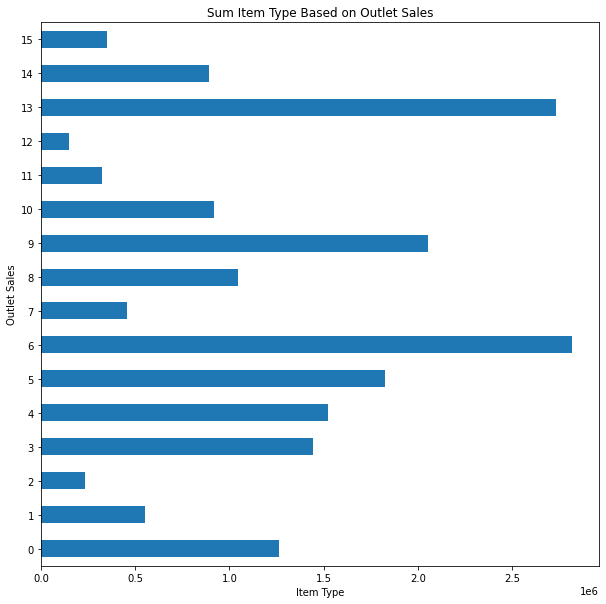

In [31]:
# EDA Simple
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
df.groupby('item_type')['item_outlet_sales'].sum().plot(kind='barh')
plt.title('Sum Item Type Based on Outlet Sales')
plt.xlabel('Item Type')
plt.ylabel('Outlet Sales')
plt.show()


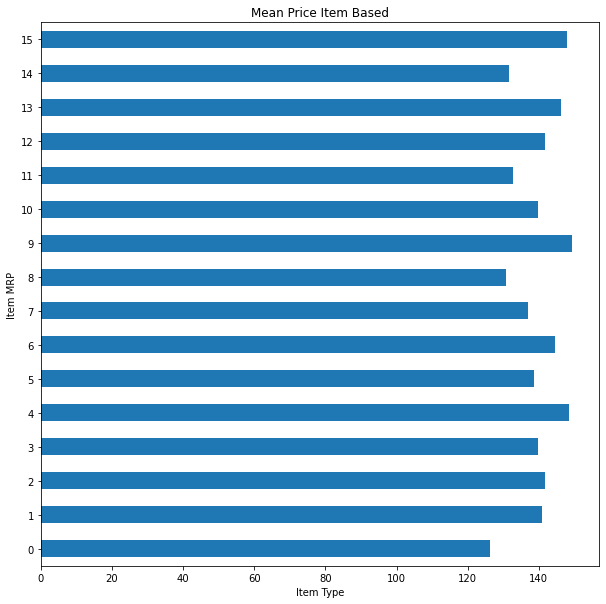

In [32]:
plt.figure(figsize=(10, 10))
df.groupby('item_type')['item_mrp'].mean().plot(kind='barh')
plt.title('Mean Price Item Based')
plt.xlabel('Item Type')
plt.ylabel('Item MRP')
plt.show()

In [33]:
# Split Model
x = df.drop(columns=['item_outlet_sales']).values
y = df['item_outlet_sales'].values

In [34]:
# Change Scaler Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [35]:
# Train Test Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)

In [36]:
# Make Model
import tensorflow as tf
from tensorflow.keras.backend import manual_variable_initialization 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [37]:
# Compile Model
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mae']
)

In [38]:
# Make Callbacks
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_mae') < 738:
            print("\nval_mae < 738")
            self.model.stop_training = True
callbacks = Callback()

In [39]:
# Train model
manual_variable_initialization(True)
hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1000,
    verbose=2,
    callbacks=[callbacks]
)

 1184875.8750 - mae: 772.2470 - val_loss: 1119189.2500 - val_mae: 755.3755
Epoch 142/1000
187/187 - 0s - loss: 1185629.7500 - mae: 771.6198 - val_loss: 1119990.3750 - val_mae: 754.0179
Epoch 143/1000
187/187 - 0s - loss: 1182079.7500 - mae: 771.9461 - val_loss: 1131812.5000 - val_mae: 750.7357
Epoch 144/1000
187/187 - 0s - loss: 1181791.3750 - mae: 770.2554 - val_loss: 1129753.8750 - val_mae: 750.4449
Epoch 145/1000
187/187 - 0s - loss: 1183266.6250 - mae: 770.8787 - val_loss: 1117312.6250 - val_mae: 749.8461
Epoch 146/1000
187/187 - 0s - loss: 1181592.3750 - mae: 771.0141 - val_loss: 1116213.5000 - val_mae: 751.0541
Epoch 147/1000
187/187 - 0s - loss: 1179873.7500 - mae: 770.2136 - val_loss: 1126395.8750 - val_mae: 758.9800
Epoch 148/1000
187/187 - 0s - loss: 1183404.6250 - mae: 771.2096 - val_loss: 1118434.8750 - val_mae: 750.3470
Epoch 149/1000
187/187 - 0s - loss: 1182180.2500 - mae: 769.4218 - val_loss: 1117188.2500 - val_mae: 751.7466
Epoch 150/1000
187/187 - 0s - loss: 1180351.0

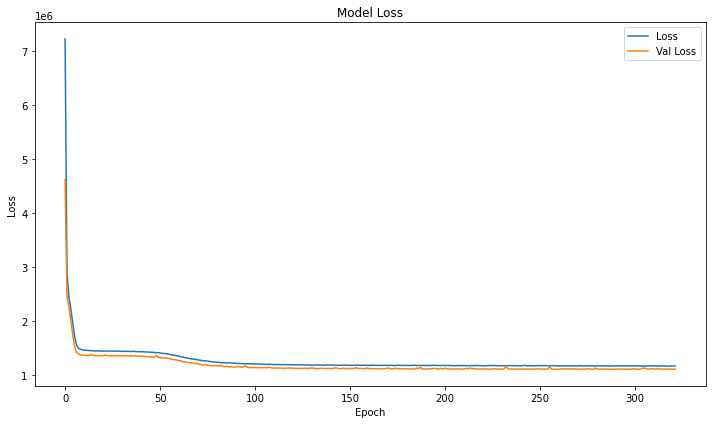

In [40]:
# Plot Loss Functions
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Loss', 'Val Loss'])
plt.tight_layout()
plt.show()

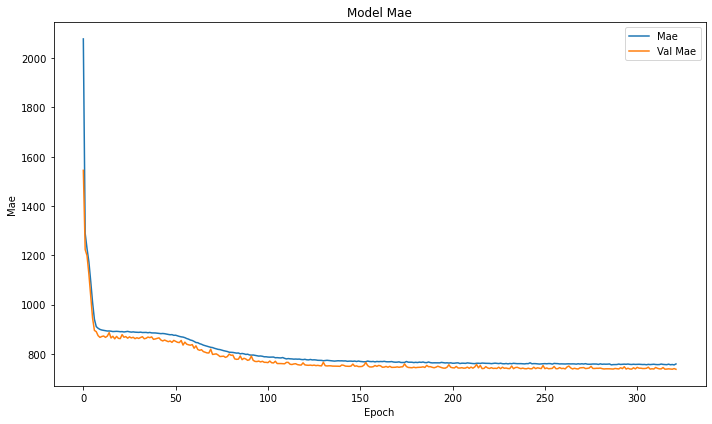

In [41]:
# Plot Mae
plt.figure(figsize=(10, 6))
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.xlabel('Epoch')
plt.ylabel('Mae')
plt.title('Model Mae')
plt.legend(['Mae', 'Val Mae'])
plt.tight_layout()
plt.show()

In [42]:
# Save model and many more
import pickle

model.save('bigmart_sales_model.h5')
pickle.dump(label_encoder_item_fat_content, open('label_encoder_item_fat_content.pickle', 'wb'))
pickle.dump(label_encoder_item_type, open('label_encoder_item_type.pickle', 'wb'))
pickle.dump(label_encoder_outlet_location_type, open('label_encoder_outlet_location_type.pickle', 'wb'))
pickle.dump(label_encoder_outlet_type, open('label_encoder_outlet_type.pickle', 'wb'))
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [46]:
# Predict model

d = {
    'item_weight': [16.75],
    'item_fat_content': ['Low Fat'],
    'item_visibility': [0.02],
    'item_type': ['Hard Drinks'],
    'item_mrp': [52.03],
    'years_established': [1987],
    'outlet_size': ['High'],
    'outlet_location_type': ['Tier 3'],
    'outlet_type': ['Supermarket Type1'],
}
data = pd.DataFrame(data=d)
data['item_fat_content'] = label_encoder_item_fat_content.transform(data['item_fat_content'])
data['item_type'] = label_encoder_item_type.transform(data['item_type'])
data['outlet_size'] = 0 if data['outlet_size'][0] == 'Small' else 1 if data['outlet_size'][0] == 'Medium' else 2
data['outlet_location_type'] = label_encoder_outlet_location_type.transform(data['outlet_location_type'])
data['outlet_type'] = label_encoder_outlet_type.transform(data['outlet_type'])
data['years_established'] = now.year - int(data['years_established'])
data = scaler.transform(data)
new_predict = model.predict(data)
print('Predict:', new_predict[0][0])

Predict: 24747.191


-------
# TEST DATA PREDICT

In [45]:
df_test = pd.read_csv('test_data.csv')
df_test['Years_Established'] = df_test['Outlet_Establishment_Year'].apply(lambda x: now.year - x) 
df_test.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace=True)
df_test.columns = [x.lower() for x in df_test.columns]
df_test['item_fat_content'] = df_test['item_fat_content'].map({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular',
    'Low Fat': 'Low Fat'
})
df_test['item_fat_content'] = label_encoder_item_fat_content.transform(df_test['item_fat_content'])
df_test['item_type'] = label_encoder_item_type.transform(df_test['item_type'])
df_test['outlet_location_type'] = label_encoder_outlet_location_type.transform(df_test['outlet_location_type'])
df_test['outlet_type'] = label_encoder_outlet_type.transform(df_test['outlet_type'])
df_test['outlet_size'] = df_test['outlet_size'].map({
    'Small': 0,
    'Medium': 1,
    'High': 2
})
df_test['outlet_size'] = df_test['outlet_size'].fillna(np.round(df_test['outlet_size'].mean()))
df_test['item_weight'] = df_test['item_weight'].fillna(df['item_weight'].mean())
df_test = scaler.transform(df_test)
predict_label = model.predict(df_test)

submission_file = pd.read_csv('test_data.csv')
submission_file.drop(columns=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], inplace=True)
submission_file['Item_Outlet_Sales'] = np.abs(predict_label)
submission_file.set_index('Item_Identifier', inplace=True)
submission_file.to_csv('test_label.csv')